In [1]:
# Import necessary libraries

from transformers import ViltProcessor, ViltForQuestionAnswering
from PIL import Image
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define the model and processor configuration
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

In [16]:
# Function to generate captions
def generate_caption(image_path, text=None, top_k=5):
    """
    Generate answers to questions about an image.

    Args:
        image_path (str): The path to the image file.
        text (str, optional): The question or text input. Default is None.
        top_k (int, optional): Number of top answers to retrieve. Default is 5.

    Returns:
        list: The top-k answers.
        list: The corresponding scores for the top-k answers.
    """
    
    # Load and preprocess the image from a local file
    with Image.open(image_path).convert('RGB') as image:
        encoding = processor(image, text, return_tensors="pt")

    encoding = processor(image, text, return_tensors="pt")
    outputs = model(**encoding)
    logits = outputs.logits

    # Get the probabilities by applying softmax on logits
    probs = logits.softmax(dim=1)

    # Get the top_k values and indices
    top_k_probs, top_k_indices = probs.topk(top_k)

    # Ensure indices are within the range of id2label dictionary
    top_k_indices = top_k_indices.clamp(max=len(model.config.id2label)-1)

    # Get the top_k answers and scores
    top_k_answers = [model.config.id2label[idx.item()] for idx in top_k_indices[0]]
    top_k_scores = top_k_probs[0].detach().numpy()

    return top_k_answers, top_k_scores

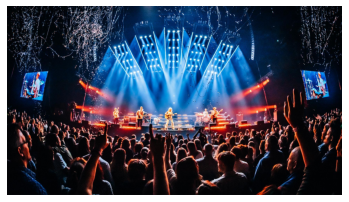

In [4]:
# Define the path to your image
image_path = r"C:\Users\HP\Desktop\Scene Detector\Test Images\scene3.jpg"

# Open the image using PIL (Python Imaging Library)
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [13]:
# Function to visualize results
def visualize_results(answers, scores):
    """
    Visualize the top answers and their scores using a horizontal bar chart.

    Args:
        answers (list): List of top answers.
        scores (list): List of corresponding answer scores.
    """
    
    plt.barh(answers, scores, color='blue')
    plt.xlabel('Scores')
    plt.ylabel('Answers')
    plt.title('Top 5 answers with their scores')
    plt.show()

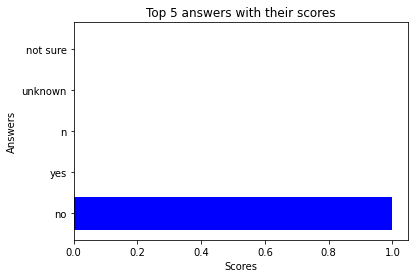

In [17]:
# Generate answers and scores for a question
answers, scores = generate_caption(image_path, text="Is it raining?")
visualize_results(answers, scores)

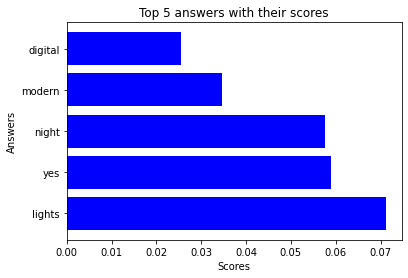

In [18]:
# Generate answers and scores for a different question
answers, scores = generate_caption(image_path, text="describe the image")
visualize_results(answers, scores)